Description: This program classifies images using Machine Learning and Convolutional Neural Networks (CNN)

What are CNN?

A convolutional neural network (CNN or convnet) is a subset of machine learning. It is one of the various types of artificial neural networks which are used for different applications and data types. A CNN is a kind of network architecture for deep learning algorithms and is specifically used for image recognition and tasks that involve the processing of pixel data.

There are other types of neural networks in deep learning, but for identifying and recognizing objects, CNNs are the network architecture of choice. This makes them highly suitable for computer vision (CV) tasks and for applications where object recognition is vital, such as self-driving cars and facial recognition.

In [ ]:
#Import the libraries

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Load the data

from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
#Look at the data types of the variables

print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
#Get the shape of the arrays

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
#Take a look at the first image as an array

index = 10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

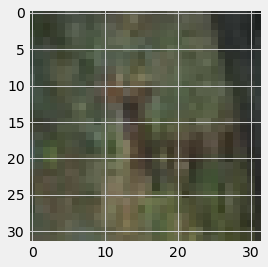

In [ ]:
#Show the image as a picture

img = plt.imshow(x_train[index])

In [ ]:
#Get the image label

print('The image label is:', y_train[index])

The image label is: [4]


In [ ]:
#Get the image classification

classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#Print the image class
print('The image class is:', classification[y_train[index][0]])

The image class is: deer


In [ ]:
#Convert the labels into a set of 10 numbers to input into the neural network

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
#Print the new labels

print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
#Print the new label of the image/picture above

print('The one hot label is:', y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
#Normalize the pixels to be values between 0 and 1

x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train[index]

In [ ]:
#Create the models architecture

model = Sequential()

#Add the first layer
model.add(Conv2D(32, (5, 5), activation = 'relu', input_shape = (32, 32, 3)))

#Add a pooling layer
model.add(MaxPooling2D(pool_size = (2, 2)))

#Add another convulation layer
model.add(Conv2D(32, (5, 5), activation = 'relu'))

#Add another pooling layer
model.add(MaxPooling2D(pool_size = (2, 2)))

#Add a flattening layer
model.add(Flatten())

#Add a layer with 1000 neurons
model.add(Dense(1000, activation = 'relu'))

#Add a drop out layer
model.add(Dropout(0.5))

#Add a layer with 500 neurons
model.add(Dense(500, activation = 'relu'))

#Add a drop out layer
model.add(Dropout(0.5))

#Add a layer with 250 neurons
model.add(Dense(250, activation = 'relu'))

#Add a layer with 10 neurons
model.add(Dense(10, activation = 'softmax'))

In [ ]:
#Compile the model

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
#Train the model

hist = model.fit(x_train, y_train_one_hot,
                 batch_size = 500,
                 epochs = 20,
                 validation_split = 0.2)

Epoch 1/20
80/80 [==============================] - 60s 744ms/step - loss: 1.8750 - accuracy: 0.2925 - val_loss: 1.5286 - val_accuracy: 0.4432
Epoch 2/20
80/80 [==============================] - 57s 717ms/step - loss: 1.4654 - accuracy: 0.4609 - val_loss: 1.3283 - val_accuracy: 0.5215
Epoch 3/20
80/80 [==============================] - 57s 708ms/step - loss: 1.2955 - accuracy: 0.5314 - val_loss: 1.2071 - val_accuracy: 0.5704
Epoch 4/20
80/80 [==============================] - 59s 743ms/step - loss: 1.1799 - accuracy: 0.5742 - val_loss: 1.1866 - val_accuracy: 0.5806
Epoch 5/20
80/80 [==============================] - 57s 714ms/step - loss: 1.1052 - accuracy: 0.6063 - val_loss: 1.0623 - val_accuracy: 0.6243
Epoch 6/20
80/80 [==============================] - 57s 713ms/step - loss: 1.0234 - accuracy: 0.6371 - val_loss: 1.0169 - val_accuracy: 0.6450
Epoch 7/20
80/80 [==============================] - 56s 702ms/step - loss: 0.9776 - accuracy: 0.6543 - val_loss: 0.9783 - val_accuracy: 0.6575

In [ ]:
#Evaluate the model using the test data set
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 5s 15ms/step - loss: 0.9807 - accuracy: 0.6920


0.6919999718666077

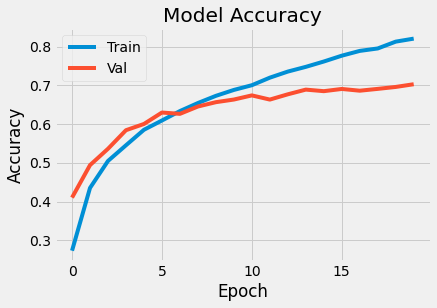

In [ ]:
#Visualize the models accuracy

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

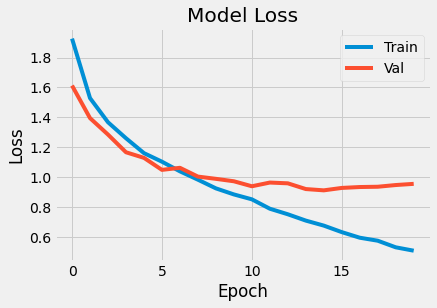

In [ ]:
#Visualize the models loss

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

In [ ]:
#Test the model with an example

from google.colab import files
uploaded = files.upload()

Saving frog.webp to frog (1).webp


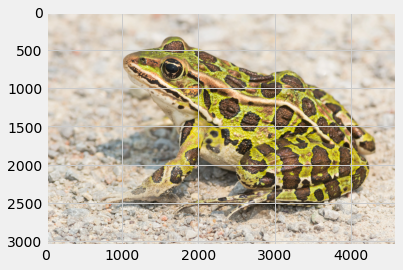

In [ ]:
#Show the image

new_image = plt.imread('frog (1).webp')
img = plt.imshow(new_image)

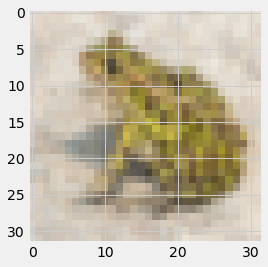

In [ ]:
#Resize the image

from skimage.transform import resize
resized_image = resize(new_image, (32, 32, 3))
img = plt.imshow(resized_image)

In [ ]:
#Get the models predictions

predictions = model.predict(np.array([resized_image]))

#Show the predictions
predictions

1/1 [==============================] - 0s 20ms/step


array([[2.3348914e-06, 1.5578270e-06, 8.1915758e-05, 6.6487035e-03,
        5.0257836e-06, 1.4404688e-04, 9.9311197e-01, 2.0416749e-07,
        6.8348037e-08, 4.2493257e-06]], dtype=float32)

In [ ]:
#Sort the predictions from least to greatest 

list_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

#Show the sorted labels in order
print(list_index)

[6, 3, 5, 2, 4, 9, 0, 1, 7, 8]


In [ ]:
#Print the first 5 predictions

for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

frog : 99.31 %
cat : 0.66 %
dog : 0.01 %
bird : 0.01 %
deer : 0.0 %
